Check for mixed data types and “bad” values (text in numeric columns, categorical features coded as continuous, nulls coded as some other value)

Group your like data types together when they should be treated similarly

Experiment with converting non-numeric variables to numeric

Check for missing values and try some different missingness handling techniques

Make a couple of basic plots of a few of your variables and notice the effects of using different methods on those plots

Keep track of your index, especially if you are removing rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats.mstats import winsorize


In [2]:
#Zip file contains only the csv, so you can access it directly with read_csv
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# #Read through this and figure out what we're doing here
# for col in df.describe().columns: nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index df.loc[nanidx, col] = '?'

# # Zip file contains only the csv, so you can access it directly with read_csv df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# #Read through this and figure out what we're doing here
# for col in df.describe().columns: nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index df.loc[nanidx, col] = '?'

In [3]:

for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'


In [4]:
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70)
weight,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

Ordinal - 
Nominal - 
Interval - 
Ratio - 

In [6]:
df.shape

(101766, 50)

In [7]:

df2 = df.replace('?', np.nan)

df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'patient_nbr', 'encounter_id'])

In [8]:
df2.shape

(101766, 45)

In [9]:
df2.isnull().sum()/df2.isnull().count()

race                        0.022336
gender                      0.000000
age                         0.000000
admission_type_id           0.000285
discharge_disposition_id    0.000639
admission_source_id         0.000354
time_in_hospital            0.000678
num_lab_procedures          0.000590
num_procedures              0.000688
num_medications             0.000914
number_outpatient           0.000305
number_emergency            0.000590
number_inpatient            0.000285
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000963
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
t

In [10]:
df2 = df2.dropna()

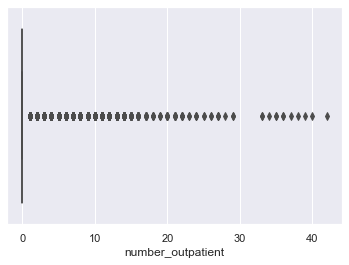

In [11]:
sns.boxplot(df2['number_outpatient'], whis = 5)

In [12]:
df2['number_outpatient'] = winsorize(df2['number_outpatient'], (0, 0.05) )

In [13]:
df2['number_inpatient'] = winsorize(df2['number_inpatient'], (0, 0.05) )
df2['number_emergency'] = winsorize(df2['number_emergency'], (0, 0.05) )


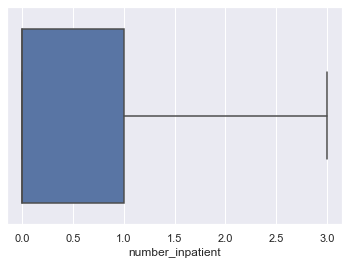

In [14]:
sns.boxplot(df2['number_inpatient'], whis = 5)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97440 entries, 1 to 101765
Data columns (total 45 columns):
race                        97440 non-null object
gender                      97440 non-null object
age                         97440 non-null object
admission_type_id           97440 non-null float64
discharge_disposition_id    97440 non-null float64
admission_source_id         97440 non-null float64
time_in_hospital            97440 non-null float64
num_lab_procedures          97440 non-null float64
num_procedures              97440 non-null float64
num_medications             97440 non-null float64
number_outpatient           97440 non-null float64
number_emergency            97440 non-null float64
number_inpatient            97440 non-null float64
diag_1                      97440 non-null object
diag_2                      97440 non-null object
diag_3                      97440 non-null object
number_diagnoses            97440 non-null float64
max_glu_serum               9

In [16]:
df2['readmitted'].dtype

dtype('O')

In [17]:
readmit = ['>30', '<30']

df2['readmitted_bool'] = df2['readmitted'].isin(readmit)




In [18]:
df2['readmitted_bool'].value_counts()

False    52007
True     45433
Name: readmitted_bool, dtype: int64

In [19]:
#sns.pairplot(df2, vars = columns_2, hue = 'readmitted_bool')

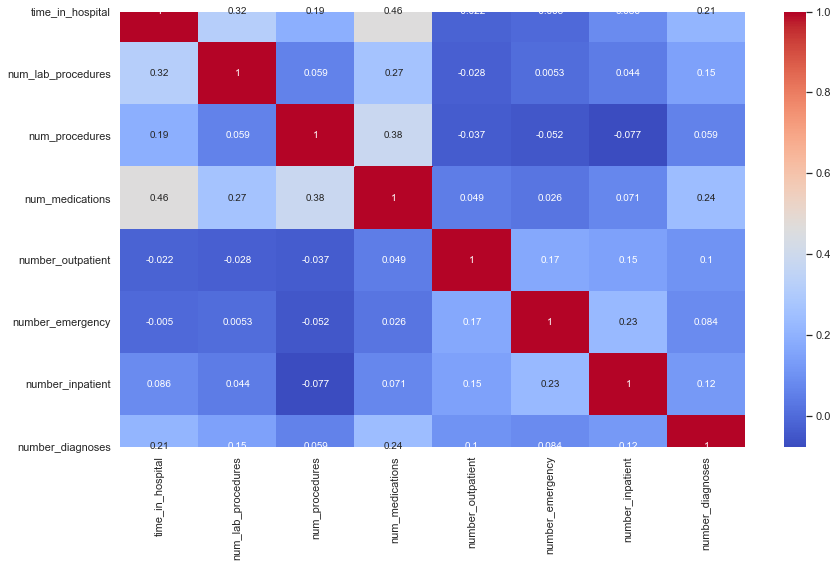

In [32]:
columns_2 = [ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']

plt.figure(figsize=(14,8))
sns.heatmap(df2[columns_2].corr(), annot=True, cmap='coolwarm')

C:\Users\brian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


ValueError: `bins` must increase monotonically, when an array

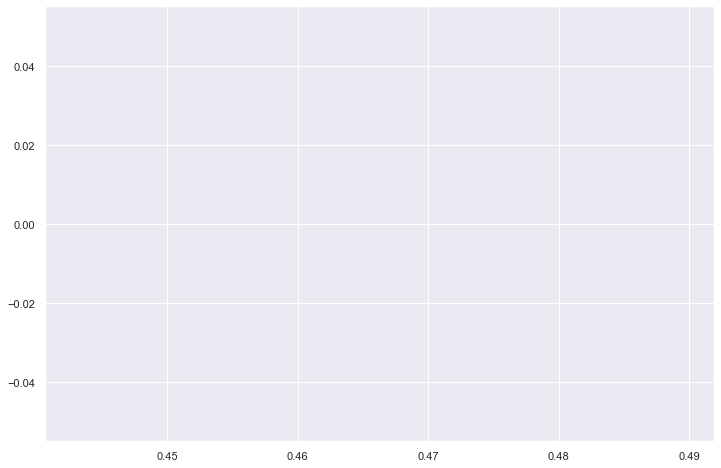

In [21]:
# for col in df2.columns:
#     plt.figure(figsize=(12,8))
#     sns.distplot(df2['readmitted_bool'] == True, df2[col])
#     sns.distplot(df2['readmitted_bool'] == False, df2[col])

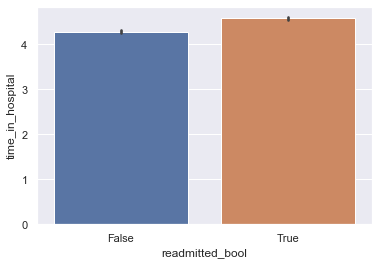

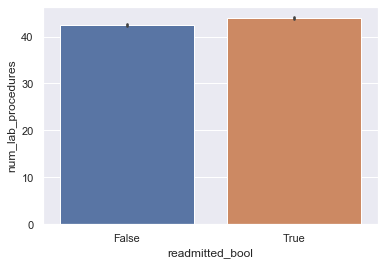

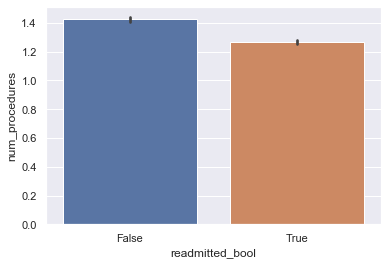

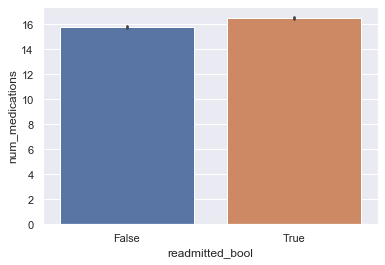

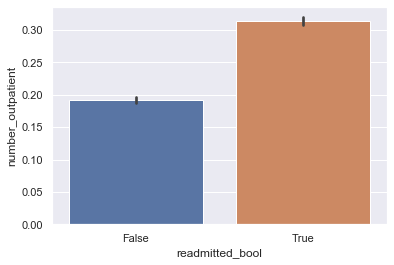

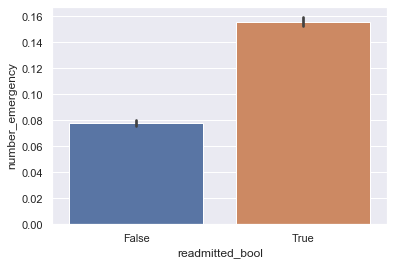

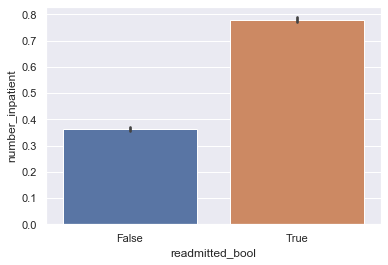

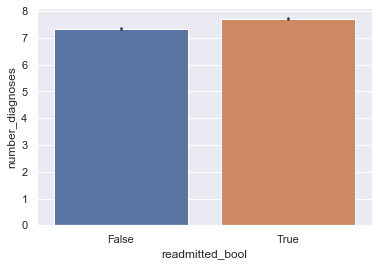

In [23]:
for col in columns_2:
    plt.figure()
    sns.barplot(df2['readmitted_bool'], df2[col])

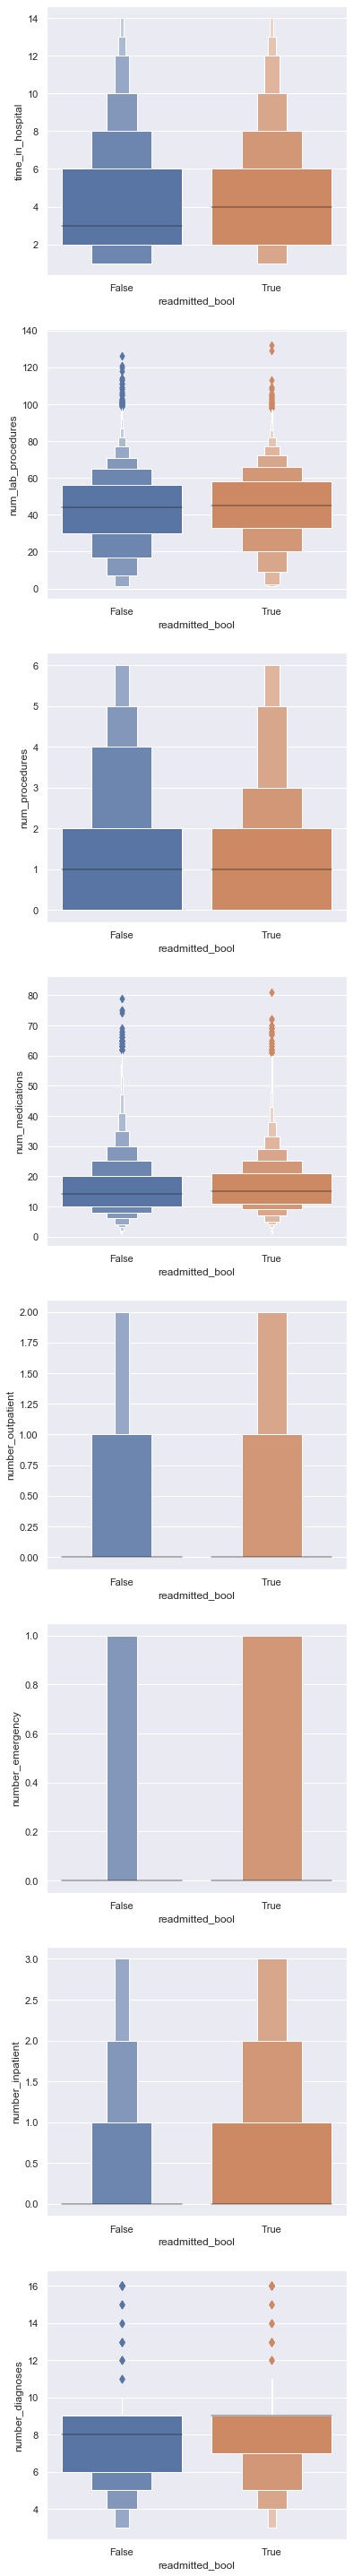

In [22]:
plt.figure(figsize=(6,52))

for col in columns_2:
    plt.subplot(len(columns_2),1, (columns_2.index(col)+1))
    sns.boxenplot(x = 'readmitted_bool', y = col, data = df2)
    plt.show

In [25]:
df2.select_dtypes(include = 'O').columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [26]:
cat_columns = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


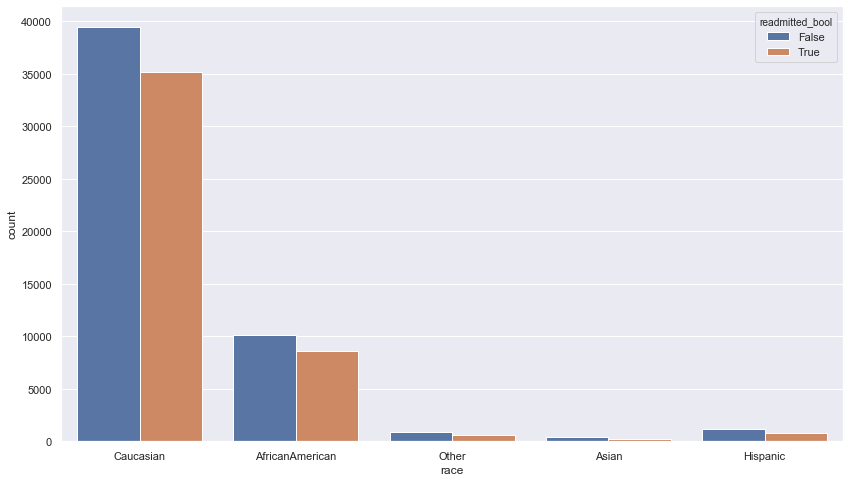

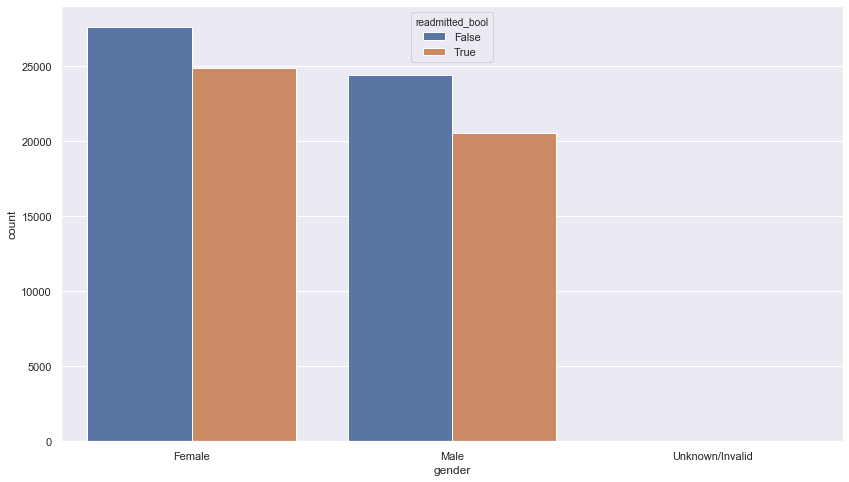

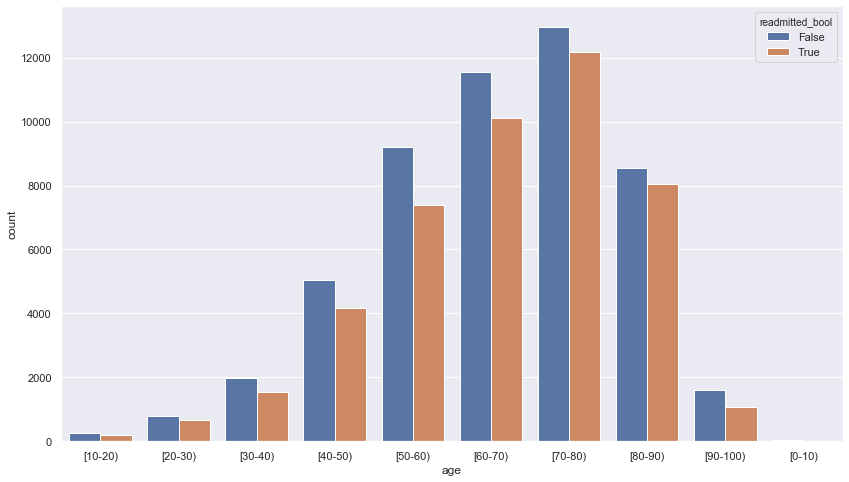

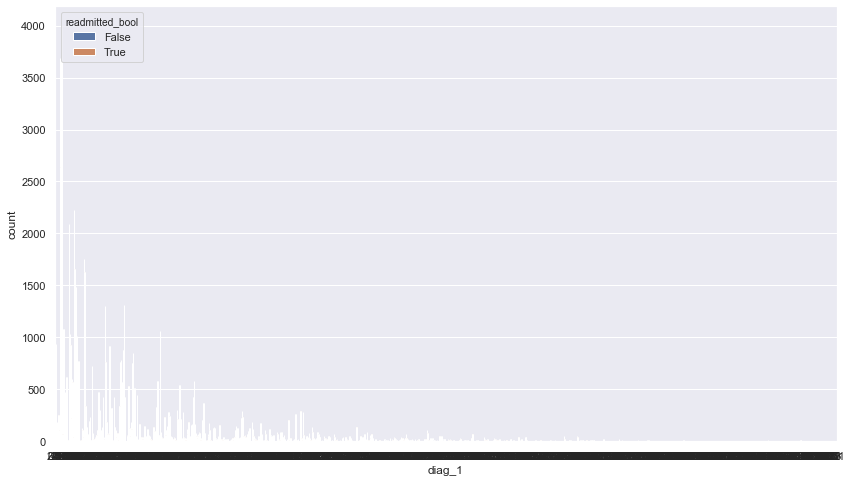

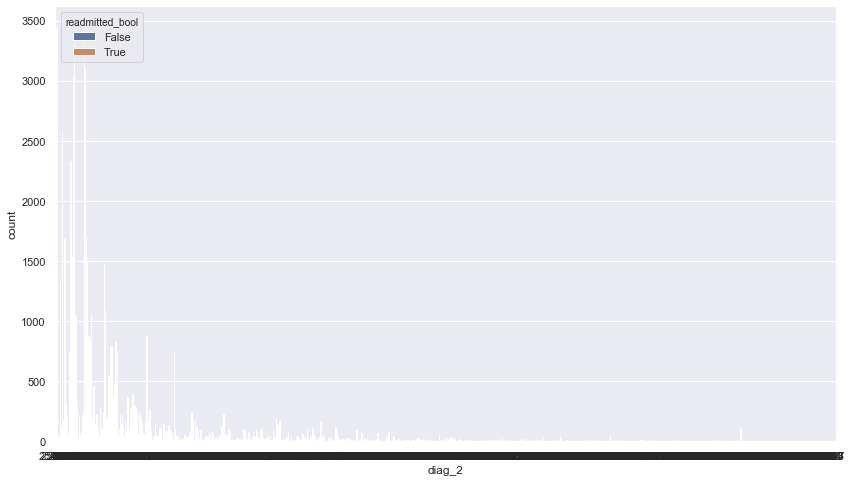

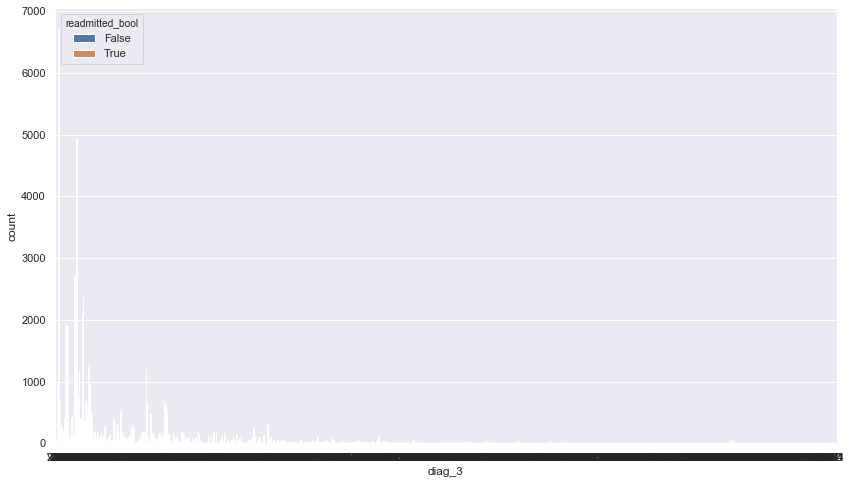

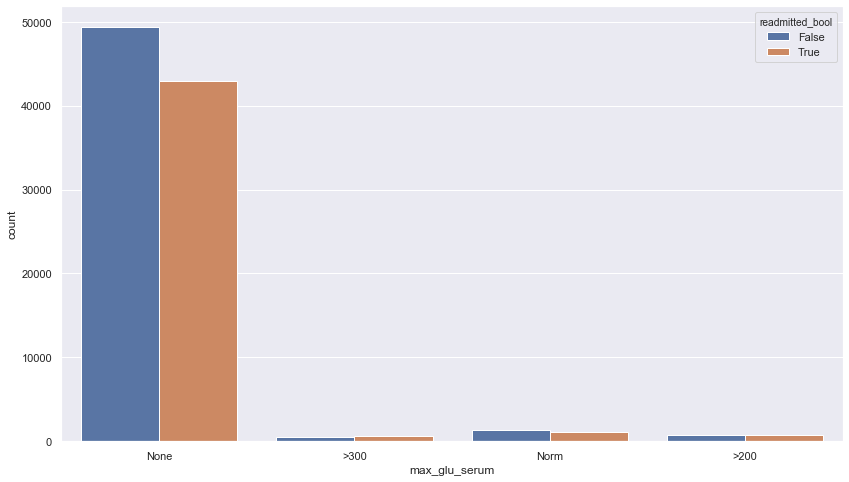

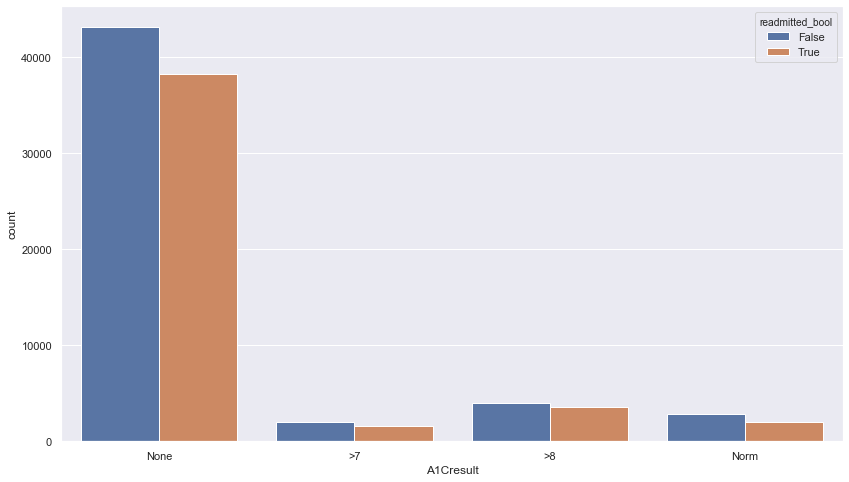

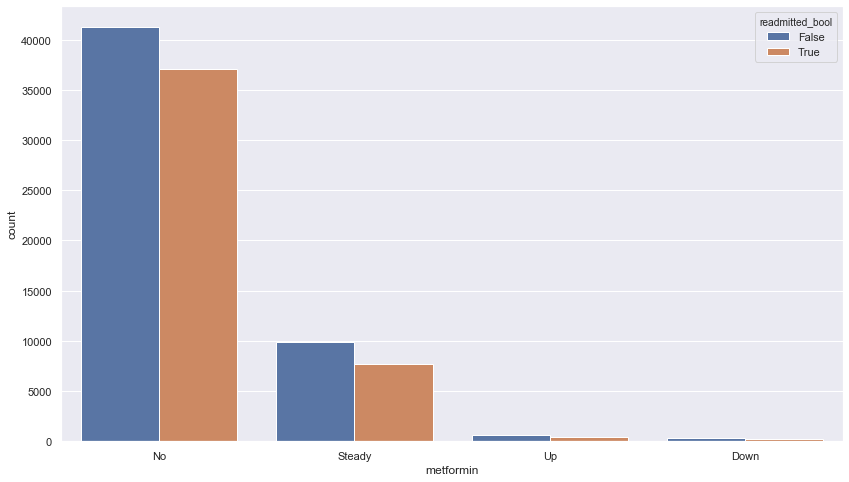

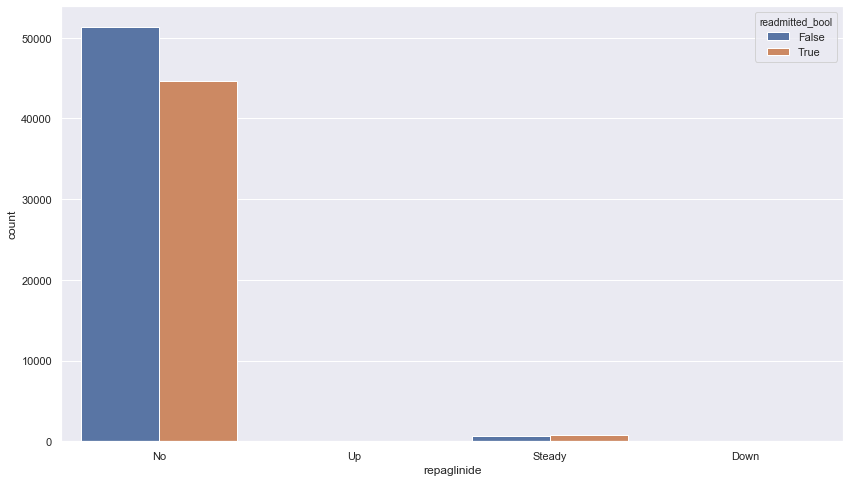

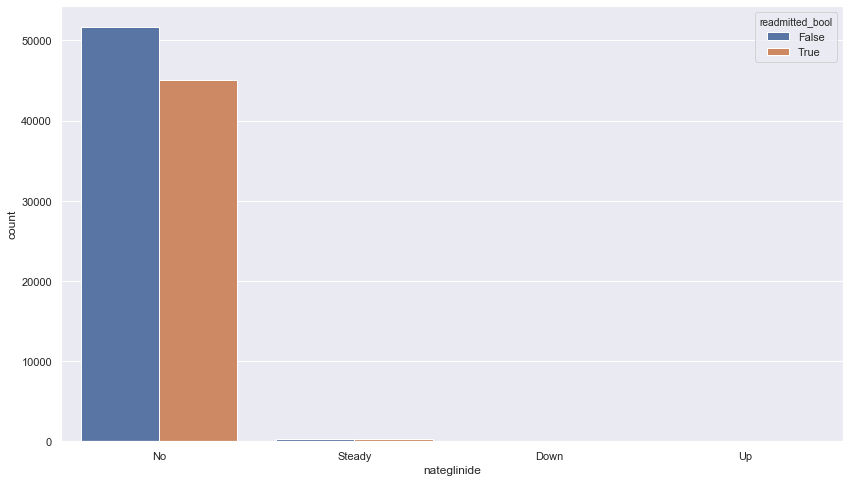

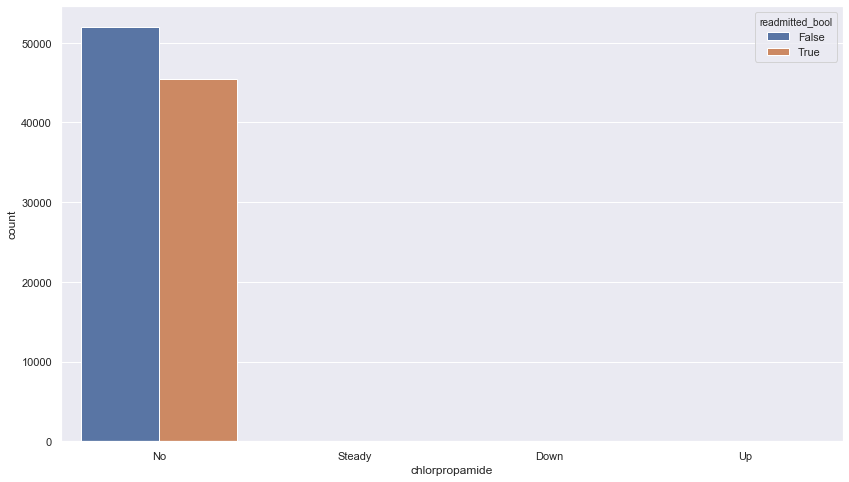

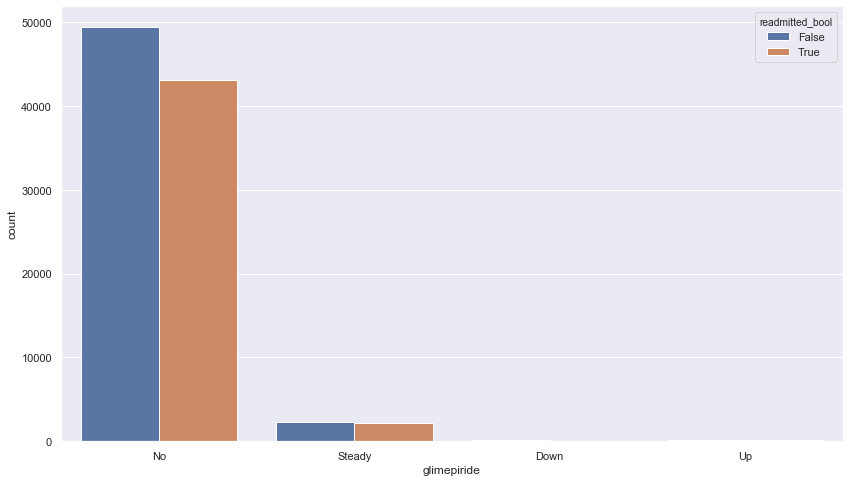

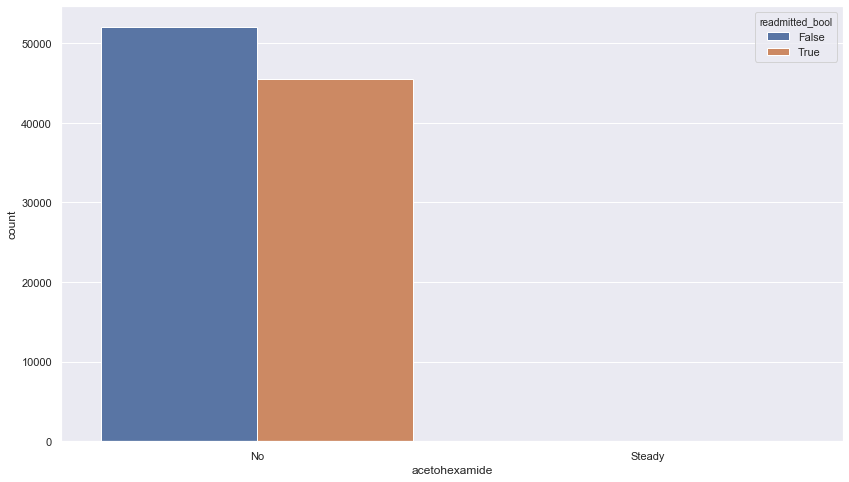

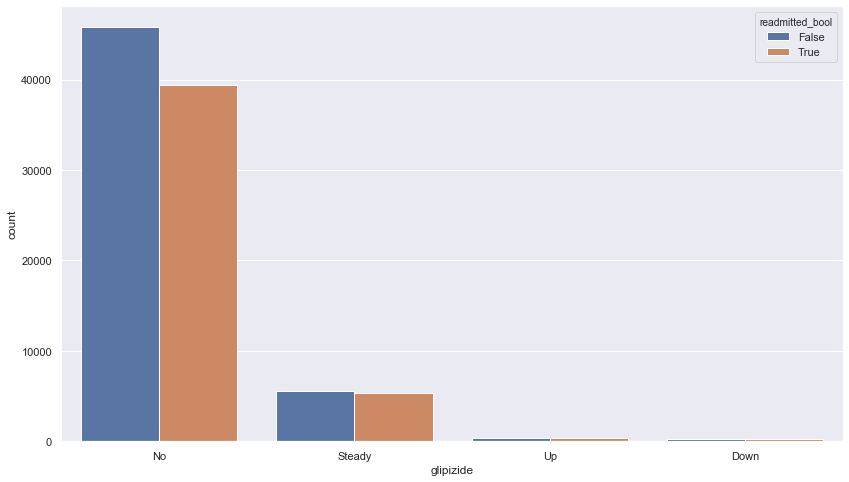

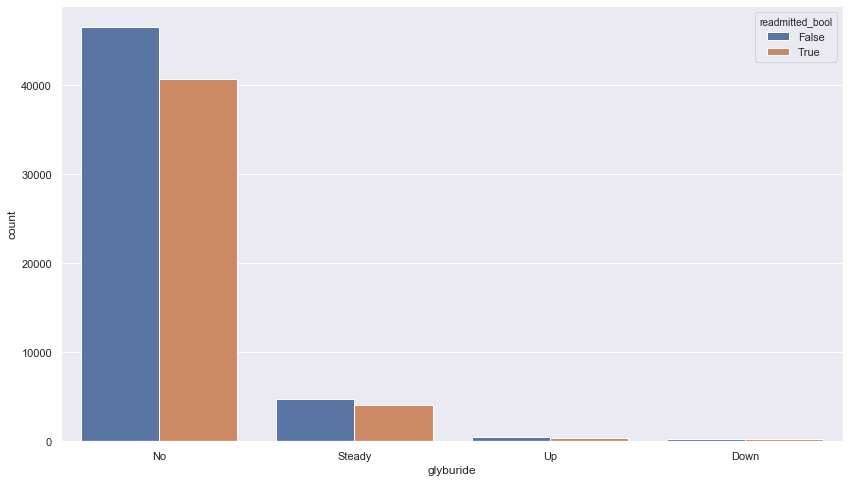

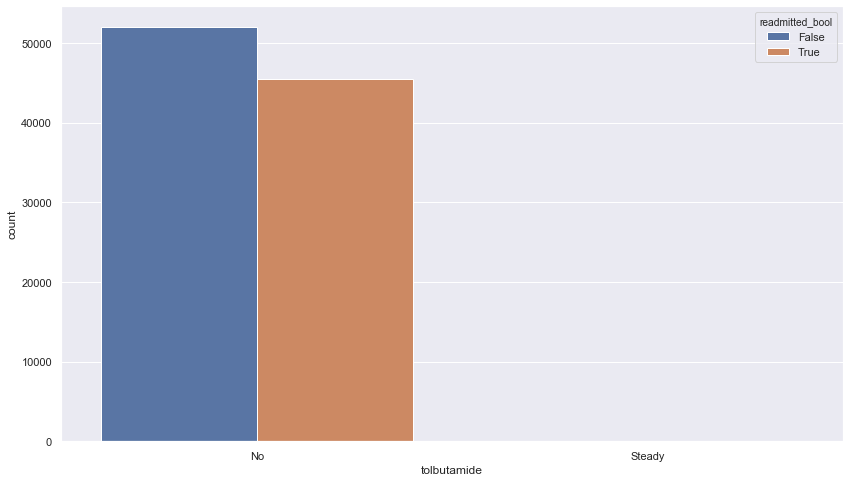

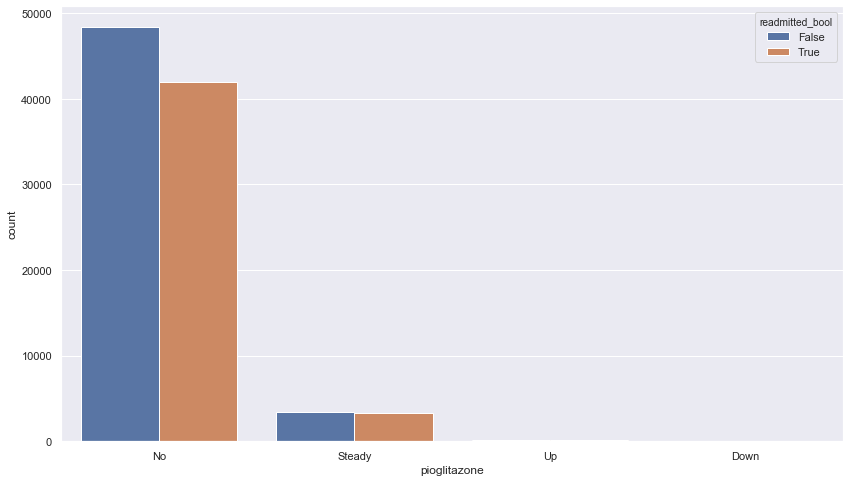

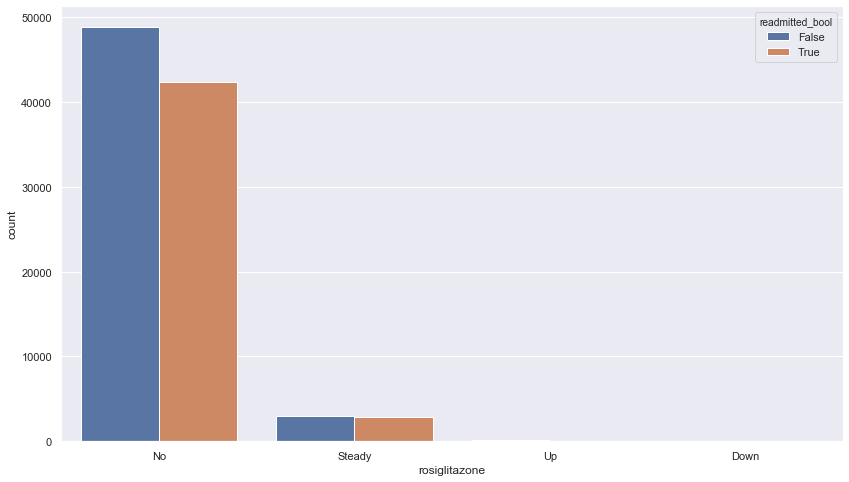

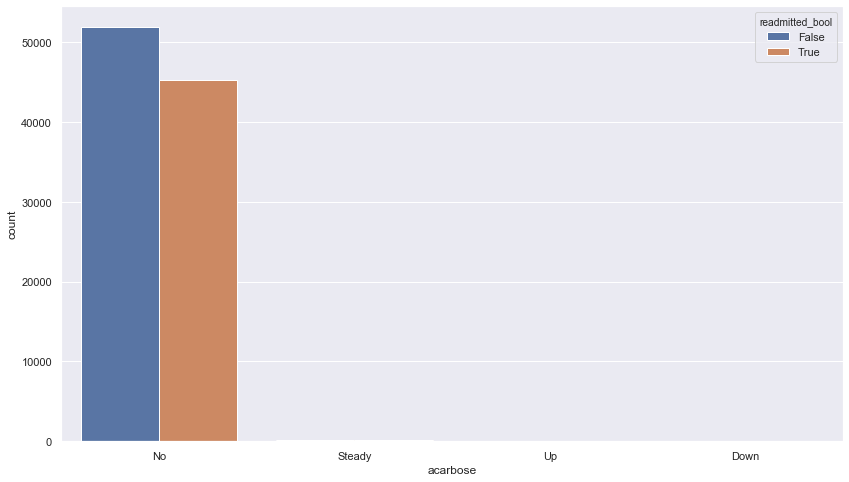

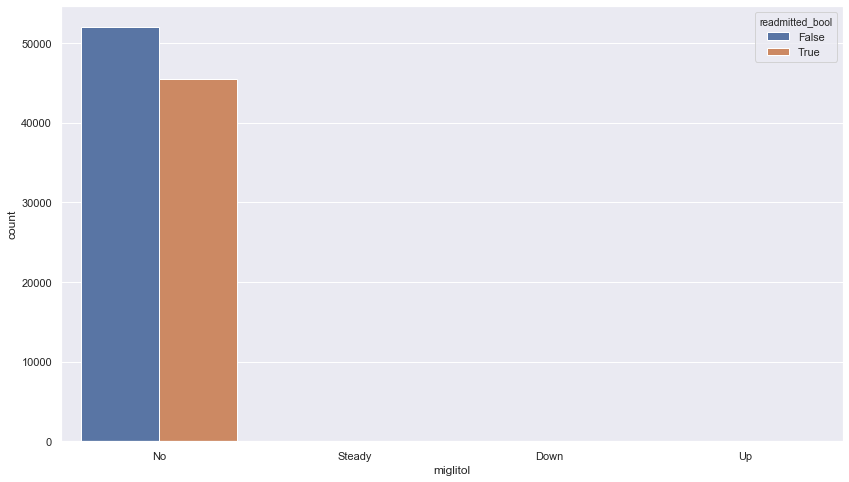

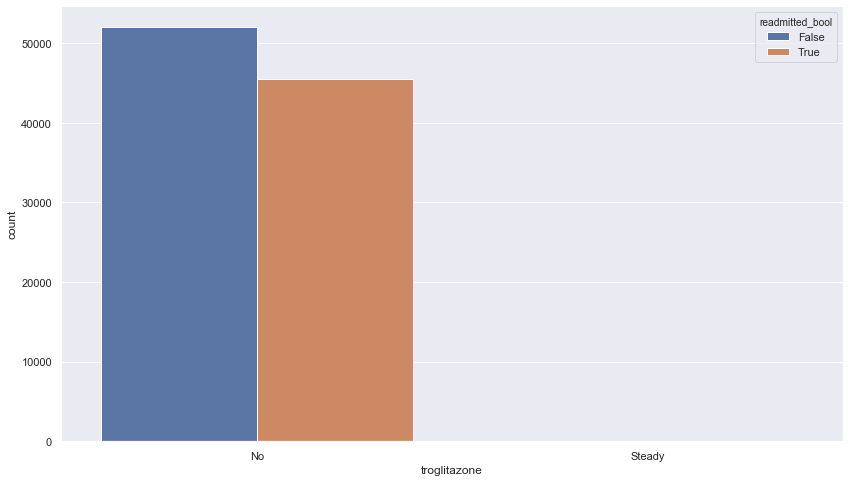

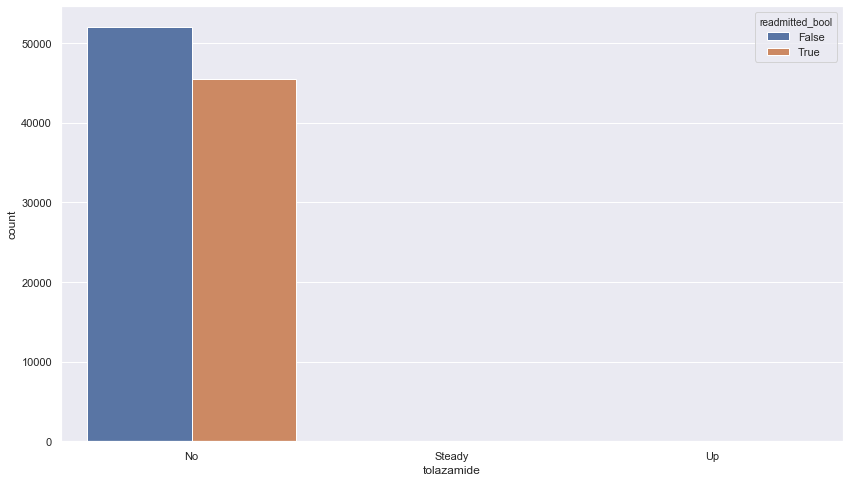

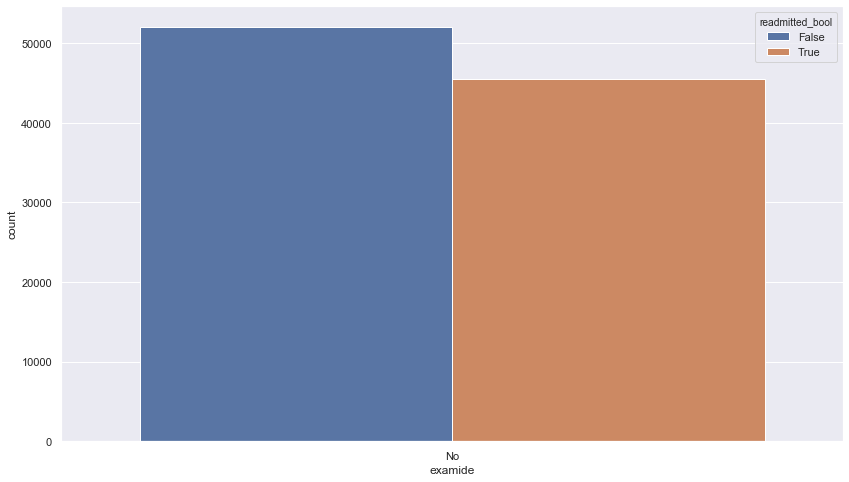

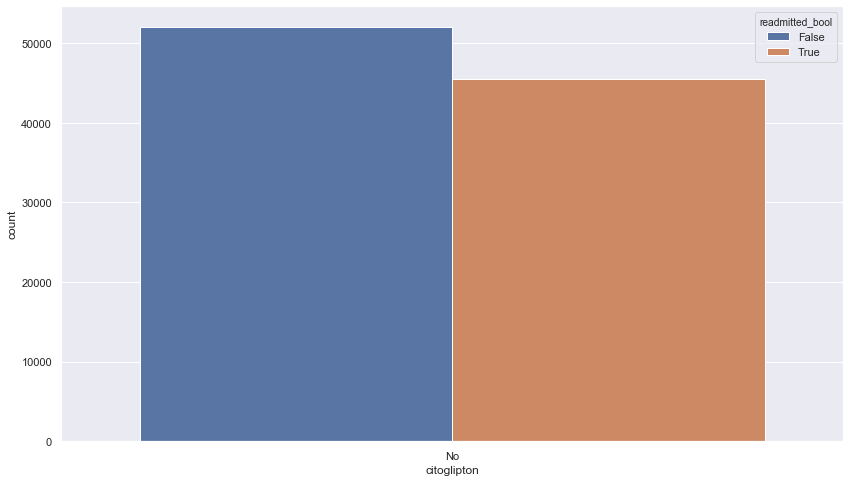

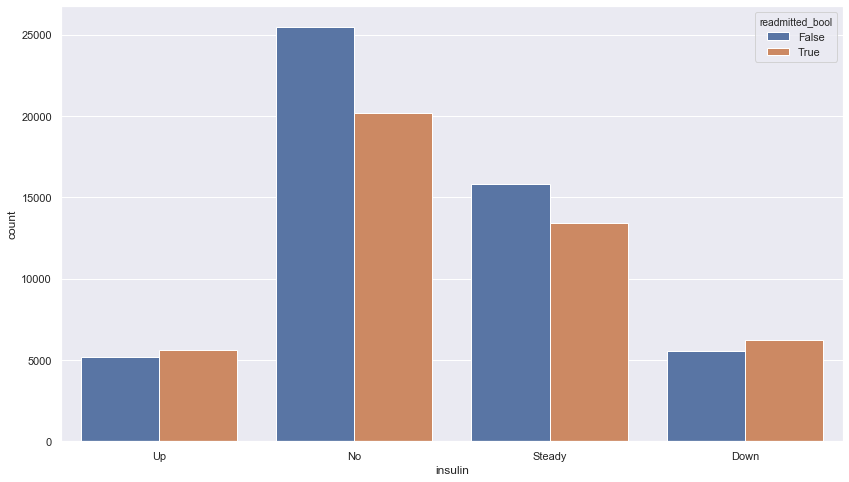

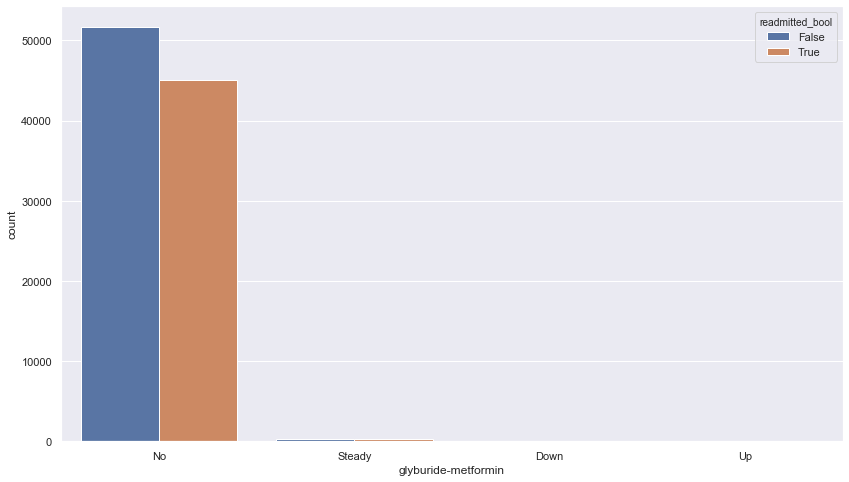

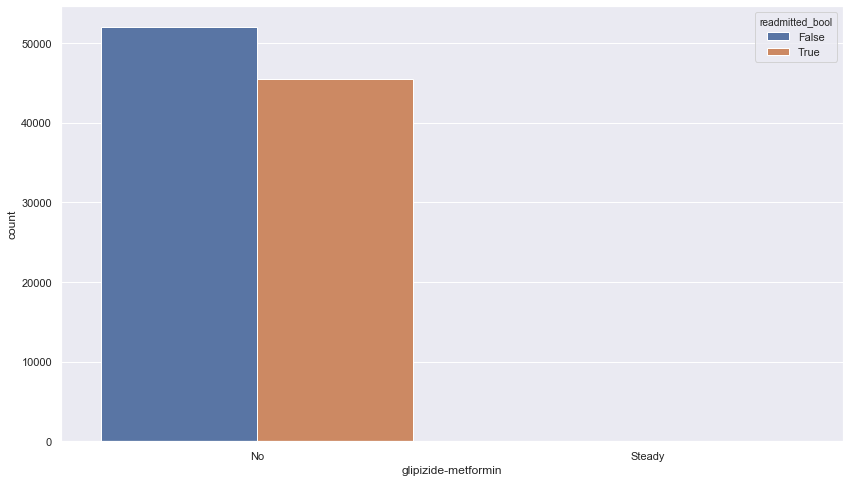

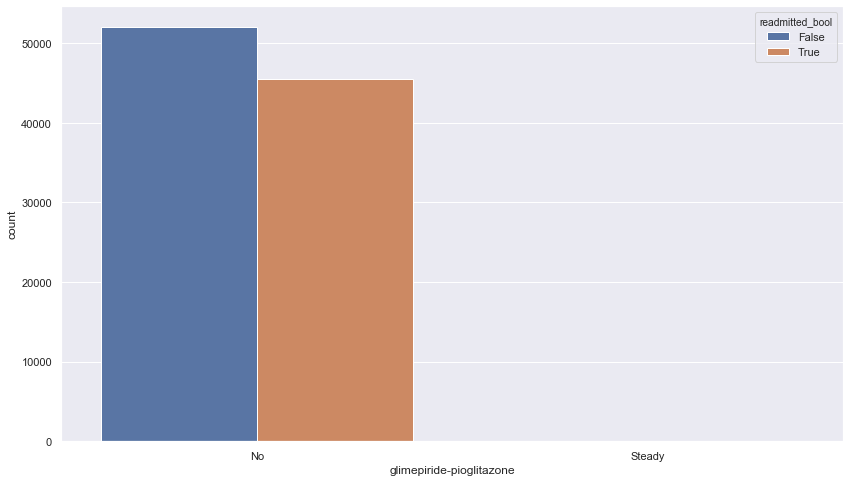

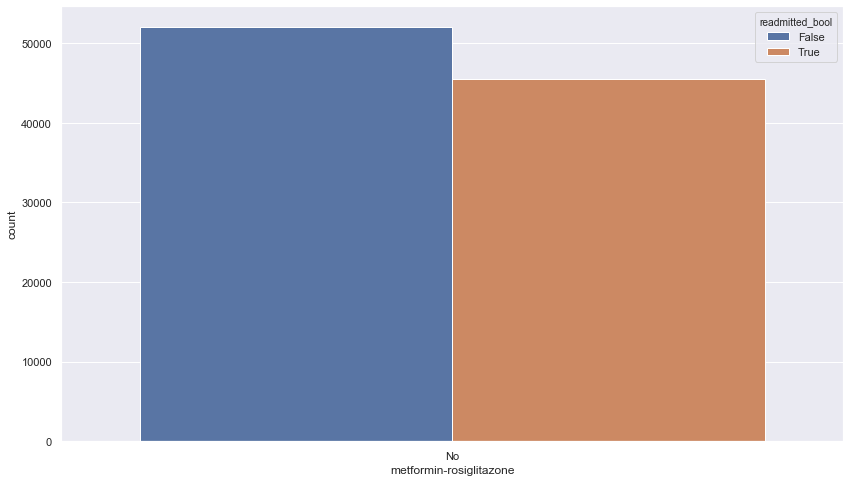

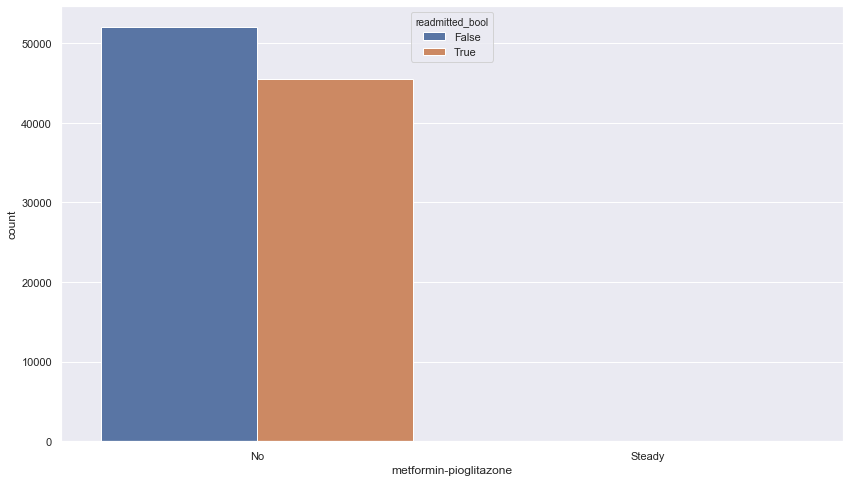

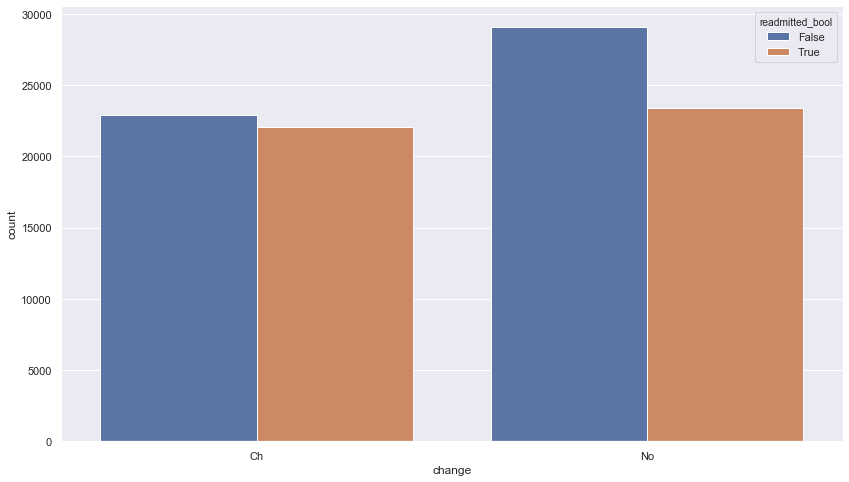

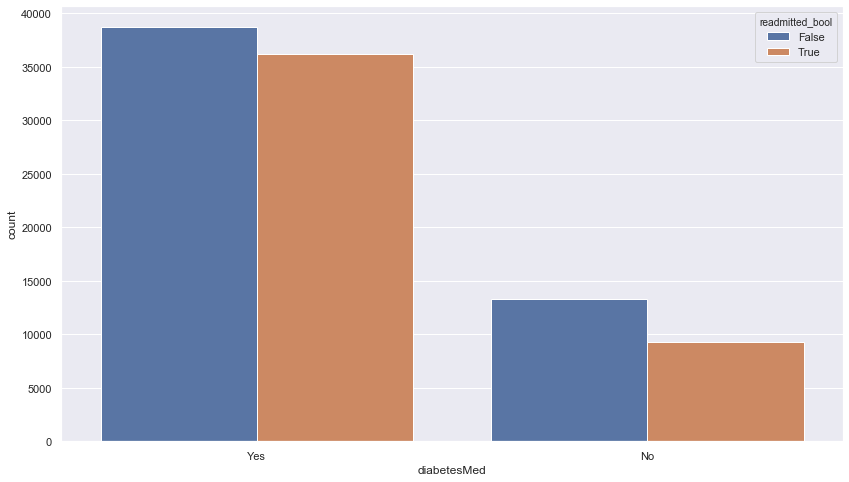

In [29]:
for col in cat_columns:
    plt.figure(figsize=(14,8))
    sns.countplot(col, data = df2, hue='readmitted_bool')
    plt.show

In [30]:
df2.columns.unique()

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_bool'],
      dtype='object')

In [50]:
df3 = df2.drop(columns = ['admission_type_id',
       'discharge_disposition_id', 'admission_source_id','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'])

In [37]:
df3.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,readmitted,readmitted_bool
1,Caucasian,Female,[10-20),3.0,59.0,0.0,18.0,0.0,0.0,0.0,>30,True
2,AfricanAmerican,Female,[20-30),2.0,11.0,5.0,13.0,2.0,0.0,1.0,NO,False
3,Caucasian,Male,[30-40),2.0,44.0,1.0,16.0,0.0,0.0,0.0,NO,False
4,Caucasian,Male,[40-50),1.0,51.0,0.0,8.0,0.0,0.0,0.0,NO,False
5,Caucasian,Male,[50-60),3.0,31.0,6.0,16.0,0.0,0.0,0.0,>30,True


Feature 1: Female column

In [52]:
df3 = df3[(df3['gender']=='Male') | (df3['gender']=='Female')]

In [53]:
df3.gender.value_counts()

Female    52507
Male      44932
Name: gender, dtype: int64

In [55]:
gender = ['Female']
df3['Female'] = df3['gender'].isin(gender)

In [56]:
df3.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,readmitted,readmitted_bool,Female
1,Caucasian,Female,[10-20),3.0,59.0,0.0,18.0,0.0,0.0,0.0,>30,True,True
2,AfricanAmerican,Female,[20-30),2.0,11.0,5.0,13.0,2.0,0.0,1.0,NO,False,True
3,Caucasian,Male,[30-40),2.0,44.0,1.0,16.0,0.0,0.0,0.0,NO,False,False
4,Caucasian,Male,[40-50),1.0,51.0,0.0,8.0,0.0,0.0,0.0,NO,False,False
5,Caucasian,Male,[50-60),3.0,31.0,6.0,16.0,0.0,0.0,0.0,>30,True,False


In [61]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_bool
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,Up,No,No,No,No,No,Ch,Yes,>30,True
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,Yes,NO,False
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,Up,No,No,No,No,No,Ch,Yes,NO,False
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,Steady,No,No,No,No,No,Ch,Yes,NO,False
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,Steady,No,No,No,No,No,No,Yes,>30,True


In [62]:
df2[columns_2].head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0
5,3.0,31.0,6.0,16.0,0.0,0.0,0.0,9.0


Feature 2: Convert age to category

In [73]:
df3['age'] = df3['age'].astype('category').cat.as_ordered()

In [74]:
dict(enumerate(df3['age'].cat.categories))

{0: '[0-10)',
 1: '[10-20)',
 2: '[20-30)',
 3: '[30-40)',
 4: '[40-50)',
 5: '[50-60)',
 6: '[60-70)',
 7: '[70-80)',
 8: '[80-90)',
 9: '[90-100)'}

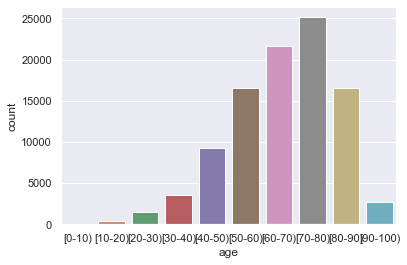

In [76]:
sns.countplot(df3['age'])

In [86]:
y = pd.get_dummies(df2['race'], drop_first=True)
y

,Asian,Caucasian,Hispanic,Other
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
...,...,...,...,...
101761,0,0,0,0
101762,0,0,0,0
101763,0,1,0,0
101764,0,1,0,0


In [90]:
df3 = pd.concat([df3, y], axis=1)

In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97440 entries, 1 to 101765
Data columns (total 17 columns):
race                  97439 non-null object
gender                97439 non-null object
age                   97439 non-null category
time_in_hospital      97439 non-null float64
num_lab_procedures    97439 non-null float64
num_procedures        97439 non-null float64
num_medications       97439 non-null float64
number_outpatient     97439 non-null float64
number_emergency      97439 non-null float64
number_inpatient      97439 non-null float64
readmitted            97439 non-null object
readmitted_bool       97439 non-null object
Female                97439 non-null object
Asian                 97440 non-null uint8
Caucasian             97440 non-null uint8
Hispanic              97440 non-null uint8
Other                 97440 non-null uint8
dtypes: category(1), float64(7), object(5), uint8(4)
memory usage: 10.1+ MB


In [95]:
df3.drop(columns = ['race', 'gender', 'readmitted'], axis=1, inplace=True)

In [96]:
df3.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,readmitted_bool,Female,Asian,Caucasian,Hispanic,Other
1,[10-20),3.0,59.0,0.0,18.0,0.0,0.0,0.0,True,True,0,1,0,0
2,[20-30),2.0,11.0,5.0,13.0,2.0,0.0,1.0,False,True,0,0,0,0
3,[30-40),2.0,44.0,1.0,16.0,0.0,0.0,0.0,False,False,0,1,0,0
4,[40-50),1.0,51.0,0.0,8.0,0.0,0.0,0.0,False,False,0,1,0,0
5,[50-60),3.0,31.0,6.0,16.0,0.0,0.0,0.0,True,False,0,1,0,0


Scaling Distribution of Time in Hospital

In [100]:
from sklearn.preprocessing  import StandardScaler, QuantileTransformer
scaler = StandardScaler()
quantile = QuantileTransformer(output_distribution='normal')

In [107]:
df3['scale_time_in_hospital'] = scaler.fit_transform(df3[['time_in_hospital']])
df3['quant_time_in_hospital'] = quantile.fit_transform(df3[['scale_time_in_hospital']])

In [114]:
plt.figure(figsize=(14,8))
for col in columns_2:
    df3['scale_'+col] = scaler.fit_transform(df3[[col]])
    df3['quant_'+col] = quantile.fit_transform(df3[[col]])

KeyError: "None of [Index(['number_diagnoses'], dtype='object')] are in the [columns]"

<Figure size 1008x576 with 0 Axes>

In [115]:
df3.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,readmitted_bool,Female,...,scale_num_procedures,quant_num_procedures,scale_num_medications,quant_num_medications,scale_number_outpatient,quant_number_outpatient,scale_number_emergency,quant_number_emergency,scale_number_inpatient,quant_number_inpatient
1,[10-20),3.0,59.0,0.0,18.0,0.0,0.0,0.0,True,True,...,-0.790609,-5.199338,0.231121,0.419741,-0.420071,-5.199338,-0.359103,-5.199338,-0.615127,-5.199338
2,[20-30),2.0,11.0,5.0,13.0,2.0,0.0,1.0,False,True,...,2.135119,1.517545,-0.385233,-0.269184,2.958634,5.199338,-0.359103,-5.199338,0.488225,0.694311
3,[30-40),2.0,44.0,1.0,16.0,0.0,0.0,0.0,False,False,...,-0.205464,0.143512,-0.015420,0.163824,-0.420071,-5.199338,-0.359103,-5.199338,-0.615127,-5.199338
4,[40-50),1.0,51.0,0.0,8.0,0.0,0.0,0.0,False,False,...,-0.790609,-5.199338,-1.001587,-1.144896,-0.420071,-5.199338,-0.359103,-5.199338,-0.615127,-5.199338
5,[50-60),3.0,31.0,6.0,16.0,0.0,0.0,0.0,True,False,...,2.720264,5.199338,-0.015420,0.163824,-0.420071,-5.199338,-0.359103,-5.199338,-0.615127,-5.199338


In [134]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97439 entries, 1 to 101765
Data columns (total 28 columns):
age                         97439 non-null category
time_in_hospital            97439 non-null float64
num_lab_procedures          97439 non-null float64
num_procedures              97439 non-null float64
num_medications             97439 non-null float64
number_outpatient           97439 non-null float64
number_emergency            97439 non-null float64
number_inpatient            97439 non-null float64
readmitted_bool             97439 non-null object
Female                      97439 non-null object
Asian                       97439 non-null uint8
Caucasian                   97439 non-null uint8
Hispanic                    97439 non-null uint8
Other                       97439 non-null uint8
scale_time_in_hospital      97439 non-null float64
quant_time_in_hospital      97439 non-null float64
scale_num_lab_procedures    97439 non-null float64
quant_num_lab_procedures    9743